In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import numpy as np

In [ ]:
input_dir='/content/drive/MyDrive/Cat_&_Dog'

In [ ]:
categories=['cats','dogs']
for category in categories:
  for file in os.listdir(os.path.join(input_dir,category)):
    img_path=os.path.join(input_dir,category,file)
    print(img_path)

/content/drive/MyDrive/Cat_&_Dog/cats/cat.931.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.920.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.996.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.919.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.921.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.997.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.923.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.995.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.92.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.926.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.965.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.998.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.979.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.910.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.974.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.967.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.999.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.972.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.912.jpg
/content/drive/MyDrive/Cat_&_Dog/cats/cat.978.jpg
/

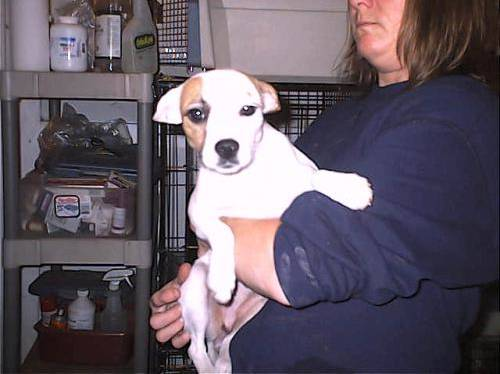

In [ ]:
Image.open('/content/drive/MyDrive/Cat_&_Dog/dogs/dog.271.jpg')

In [ ]:
img=imread(img_path)

In [ ]:
print(img)

[[[189 191 188]
  [188 190 187]
  [188 190 187]
  ...
  [ 33  48  87]
  [ 33  48  87]
  [ 29  44  83]]

 [[136 135 133]
  [135 134 132]
  [134 133 131]
  ...
  [ 35  50  89]
  [ 36  51  90]
  [ 33  48  87]]

 [[123 114 115]
  [122 113 114]
  [122 113 114]
  ...
  [ 36  51  90]
  [ 38  53  92]
  [ 37  52  91]]

 ...

 [[203 202 210]
  [196 195 203]
  [199 198 206]
  ...
  [ 22  20  25]
  [ 15  13  18]
  [  9   7  12]]

 [[190 189 197]
  [190 189 197]
  [198 197 205]
  ...
  [ 20  18  23]
  [ 17  15  20]
  [ 14  12  17]]

 [[178 177 185]
  [186 185 193]
  [200 199 207]
  ...
  [ 17  15  20]
  [ 16  14  19]
  [ 17  15  20]]]


In [ ]:
img=resize(img,(15,15))

In [ ]:
img

array([[[0.31447433, 0.24321317, 0.23197248],
        [0.31473444, 0.25829931, 0.25009635],
        [0.37603242, 0.38626669, 0.43833007],
        [0.52377736, 0.62267643, 0.74806549],
        [0.61373137, 0.66721304, 0.72481609],
        [0.66615638, 0.67651741, 0.69723087],
        [0.67219009, 0.6510116 , 0.64891423],
        [0.68000863, 0.63939703, 0.61979694],
        [0.62367816, 0.62731368, 0.65112712],
        [0.57088389, 0.6421526 , 0.77127892],
        [0.63418155, 0.5911052 , 0.7352835 ],
        [0.34512975, 0.44983101, 0.61446714],
        [0.15542689, 0.23508032, 0.39290372],
        [0.12272879, 0.19470655, 0.33743523],
        [0.12892087, 0.19110016, 0.32057771]],

       [[0.3793091 , 0.21921651, 0.20729788],
        [0.44622776, 0.29398657, 0.26058061],
        [0.63191661, 0.54868078, 0.52530983],
        [0.88456918, 0.85364735, 0.82253971],
        [0.94184414, 0.87121124, 0.77085997],
        [0.95017374, 0.87790371, 0.77170347],
        [0.93556454, 0.86159091,

In [ ]:
img=img.flatten()

In [ ]:
data=[]
labels=[]

In [ ]:
for category_idx , category in enumerate(categories):
  for file in os.listdir(os.path.join(input_dir,category)):
    img_path=os.path.join(input_dir,category,file)
    img=imread(img_path)
    img=resize(img,(15,15))
    data.append(img.flatten())
    labels.append(category_idx)

In [ ]:
labels=np.asarray(labels)
data=np.asarray(data)

In [ ]:
labels.dtype

dtype('int64')

In [ ]:
data.shape

(2000, 675)

In [ ]:
labels.shape

(2000,)

In [ ]:
#model selection

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2, shuffle=True, stratify=labels)

#x_train, x_test, y_train, y_test=train_test_split(data,labels, test_size=0.2,shuffle= True,stratify=labels)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
x_train

array([[-1.0645098 , -1.15364946, -1.15056052, ..., -1.82409548,
        -1.71860013, -1.3123004 ],
       [-1.21471043, -1.29577446, -1.25770824, ..., -0.11371758,
        -0.28812698, -0.45131082],
       [-1.33386668, -1.04860666, -1.13169725, ..., -1.18154334,
        -1.14090828, -1.06018792],
       ...,
       [ 0.28516434,  0.31124468,  0.61163407, ..., -0.67484563,
        -0.85961985, -0.81248544],
       [-0.97869851, -0.39833095,  0.28499109, ..., -0.42918733,
         0.01020747,  0.5664241 ],
       [-0.53578445, -0.30180755, -0.92438669, ..., -0.65530074,
        -0.46860099, -1.11626302]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
l=LogisticRegression()

In [ ]:
l.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred=l.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc=accuracy_score(y_test,pred)

In [ ]:
acc

0.5875

In [ ]:
# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree=DecisionTreeClassifier()

In [ ]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_1=tree.predict(x_test)

In [ ]:
acc_2=accuracy_score(y_test,pred)

In [ ]:
acc_2

0.5875

In [ ]:
from  sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
pred_3=rf.predict(x_test)

In [ ]:
acc_3=accuracy_score(y_test,pred)

In [ ]:
acc_3

0.5875

In [ ]:
#Hyperparamter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid={'n_estimators':[200,500,1000],
            'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['ginni','entropy']}

cv_rfc=GridSearchCV(estimator=rfc,param_grid=param_grid, cv=5)
cv_rfc.fit(x_train,y_train)
cv_rfc.best_params_

rfc1=RandomForestClassifier(random_state=42,max_features='auto',n_estimators=200,max_depth=8,criterion='gini')






# cv_rfc= GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5)
# cv_rfc.fit(x_train,y_train)
# cv_rfc.best_params_

# rfc1= RandomForestClassifier(random_state=42,max_features='auto',n_estimators=200,max_depth=8,criterion='gini')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
rfc1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=200,
                       random_state=42)

In [ ]:
pred=rfc1.predict(x_test)

In [ ]:
acc_3=accuracy_score(y_test,pred)

In [ ]:
acc_3

0.59